<a href="https://colab.research.google.com/github/Tommy975/ML_Intro/blob/main/InitiationMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenClassroom - Initiez-vous au machine learning - Régression linéaire
_____ 
### I. Problématique et données

_____ 






> Étant donné les caractéristiques de mon appartement, combien devrais-je normalement payer mon loyer ?

Notre training set se compose d'un ensemble de N=545 surfaces et loyers associés.

Soit soit forme mathématique: **_(x,y) = (surface,loyer)_**

Commençons par afficher nos données.

_"1) From Github (Files < 25MB)_
_The easiest way to upload a CSV file is from your GitHub repository. Click on the dataset in your repository, then click on View Raw. Copy the link to the raw dataset and store it as a string variable called url in Colab as shown below (a cleaner method but it’s not necessary). The last step is to load the url into Pandas read_csv to get the dataframe."_



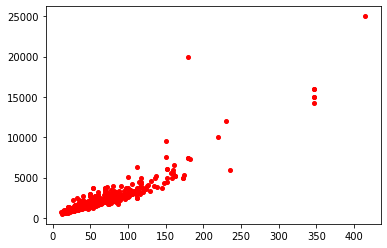

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# On charge le dataset dans un dataframe panda
url = 'https://raw.githubusercontent.com/Tommy975/ML_DL/main/Datasets/house.csv?token=AFLKTMRQXFWTDRXZWAOZ4BDADGGFU'
df1 = pd.read_csv(url)

# on affcihe le nuage de point dont on dispose
plt.plot(df1['surface'],df1['loyer'], 'ro', markersize=4)
plt.show()


> D'apres la figure ci-dessus, il est facilement observable qu'il existe **_une relation linéaire entre la surface et le montant du loyer_**.

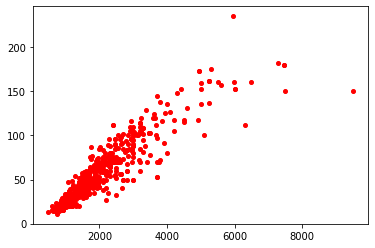

In [ ]:
house_data = df1[df1['loyer'] < 10000]

plt.plot(house_data['loyer'], house_data['surface'], 'ro', markersize=4 )

On trouve  la valeur numerique de theta pour nos données:

In [ ]:
# On décompose le dataset et on le transforme en matrices pour pouvoir effectuer notre calcul
X = np.matrix([np.ones(house_data.shape[0]), house_data['surface'].values]).T
y = np.matrix(house_data['loyer']).T

# On effectue le calcul exact du paramètre theta (direct)
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(theta)

[[266.45460292]
 [ 30.66119596]]


Notre modèle final qui colle bien aux données sera donc dans notre cas (approximativement) :

> loyer=30.7×surface+266.4

Représentons graphiquement la droite que nous avons trouvée, afin de s'assurer que celle-ci *"colle bien aux données"*

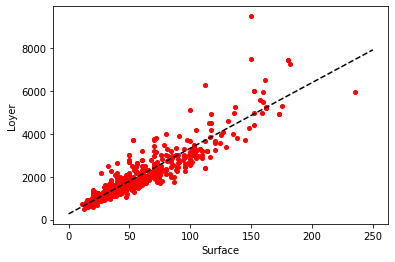

In [ ]:
plt.xlabel('Surface')
plt.ylabel('Loyer')

plt.plot(house_data['surface'], house_data['loyer'], 'ro', markersize=4)

# On affiche la droite ente 0 et 250
plt.plot([0,250], [theta.item(0), theta.item(0)+250*theta.item(1)], linestyle='--',c='#000000')

plt.show()


# Utiliser le modeles pour faier des prédictions
-----

Exemple pour une surface de 35m^2:


```
# This is formatted as code
theta.item(0) + theta.item(1) * 35 = 1339.646166
```

--------

Nous venons d'implémenter l'algorythme de regression lineraire. Cenpendant, celui-ci, tout comme plusieurs autres, sont déja implémenté dans divers librairies (sklearn par exemple)



```
# This is formatted as code
from sklearnimport linera_model
regr = linera_model.LineraRegression()
regr.fit(X,y)
regr.predict(<TestData>)
```



# Échantillonnage des données

Ca ne sert à rien d'utiliser toutes les données pour tester des modèles et se retrouver à attendre à chaque fois plusieurs minutes au lieu de quelques secondes, n'est-ce pas ?

> On peut quand même utiliser tout le dataset pour entraîner le modèle final. Mais pour explorer et pour le travail quotidien, il vaut en général mieux tester sur une petite partie des données.

Le problème lorsque l'on effectue un échantillonnage, c'est que l’on doit être bien sûr que cet échantillon est représentatif de toutes les données. En effet, dans l’exemple des loyers par exemple, si je ne récupère que des données qui proviennent d'Ile-de-France, je serai forcément biaisé pour mes prédictions de loyer qui proviennent d'autres régions. Il faut donc s’assurer de piocher les données de manière uniforme sur toute la population que l'on souhaite considérer.

> Attention!! Il faut donc être vraiment vigilant lors du sampling. en effet, si l'on ne selectionne pas de maniere bien distribué, **On augment le biais**. De ce fait, notre modele en resortirait moins representatif de la réalité.

### Échantillonnage a proprement parler



```
# This is formatted as code

sample= np.random.randint(data_size, size=int(data_size*0.1) )
sample_data = data[sample]

```

La meilleur approche est de séparer des le départ notre jeu de données en deux parties distinctes:


*   Training Set
*   Testing Set

Cést a nous de définir la proportion du dataset que l'on so8uhaite allourer a chaque partie.

De maniere generale, les données sont séoarées selon les proportions suivantes: 80%(Training) 20%(Testing)

La Librairie SKlearn nous permet de réaliser cette séparation des données a l'aide de la fontion ` train_test_split ` prennant en parameter la proportion désirée:



```
# This is formatted as code

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8)
```

